In [109]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import glob
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.cm as cm
import matplotlib.ticker as ticker

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
def cal_eff_purity_ownMC(file_name,file_list, tree, base_filter, N_gen):
    
    variables = ['Dp_isSignal','Dp_M','__experiment__', '__run__', '__event__']
    
    N_rec = 0

    # Initialize an empty dataframe to store concatenated results
    concatenated_df = pd.DataFrame()

    for file in file_list:
        recon_df = get_pd(file, tree, base_filter, variables)
        N_rec += len(recon_df)
        extracted_df = recon_df[["__experiment__", "__run__", "__event__"]].drop_duplicates()

        # Concatenate the extracted dataframe with the concatenated_df
        concatenated_df = pd.concat([concatenated_df, extracted_df], ignore_index=True)

    multiplicity = N_rec / len(concatenated_df) 

    eff = N_rec/N_gen
    
    recon_df = get_pd(file_name, tree, base_filter, variables)
    N_true = len(recon_df.query('Dp_isSignal==1'))
    purity = N_true/N_rec
    signal_eff = eff * purity
    
    signal_eff_error = math.sqrt(signal_eff * (1 - signal_eff) / N_gen)
    
    print(f"signal_eff={signal_eff:.4f}, signal_eff_error={signal_eff_error: .4f} ,eff={eff:.4f}, purity={purity:.4f}, multiplicity={multiplicity:.4f}, ")
    
    return (signal_eff, eff, purity, multiplicity)

# D+ -> (eta -> gg) pi+

In [111]:
file = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_gg/240405_tight_v1_treefit_BCS_etapi0const/'
file += '*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
base_filter = "etapip_gg_rank==1"
variables = ['Dp_M','Dp_isSignal','Dp_chiProb']
tree = 'etapip_gg'

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dp_isSignal==1')
std_dev_Dp_M_true = df2['Dp_M'].std()
print("Standard deviation of column 'Dp_M':", std_dev_Dp_M_true)

x_start = 1.8697 - 4.5*std_dev_Dp_M_true
x_end = 1.8697 + 4*std_dev_Dp_M_true

print(x_start)
print(x_end)


# base_filter=' Dp_M>0'
base_filter='etapip_gg_rank==1'
base_filter+=' &&  Dp_M>' + str(x_start) + ' && Dp_M<' + str(x_end)
tree = 'etapip_gg'
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D+ -> (eta -> gg) pi+ eff:' + str(D0signal_eff))

Standard deviation of column 'Dp_M': 0.019643813547561197
1.7813028390359746
1.9482752541902446
20
signal_eff=0.1122, signal_eff_error= 0.0003 ,eff=0.1181, purity=0.9503, multiplicity=1.0000, 
D+ -> (eta -> gg) pi+ eff:0.112242


118111


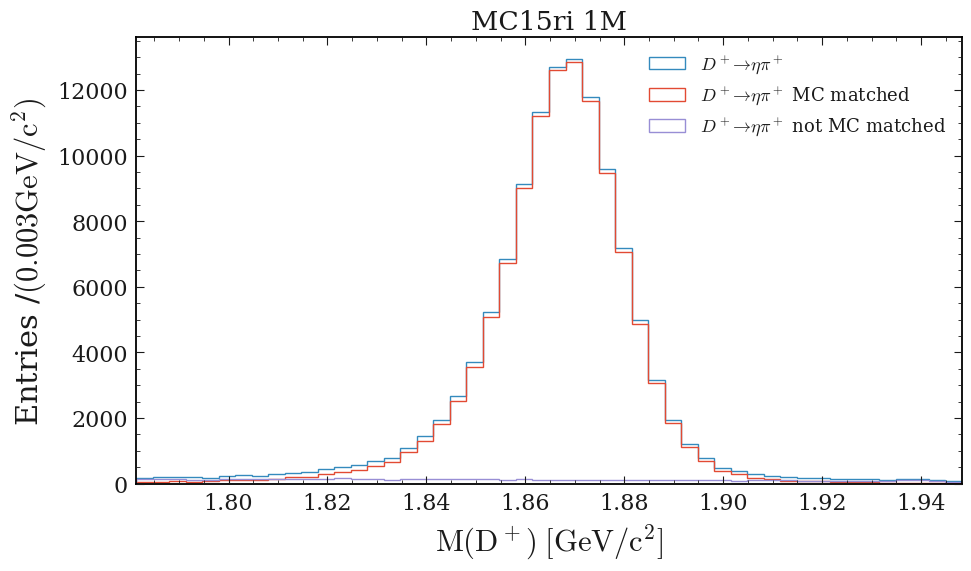

In [112]:
variables = ['Dp_M','Dp_isSignal','Dp_chiProb','Dp_mcErrors']

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dp_isSignal==1')
df3 = df.query('Dp_isSignal!=1')

fig = plt.figure(figsize=(10, 6))

ax = fig.subplots()
xrange = (x_start,x_end,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=13)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg/MC15ri_tight_v1_DpM_BCS_SR.png"
plt.savefig(file1_name)
print(len(df))

In [113]:
df['Dp_mcErrors'].describe()

count    118111.000000
mean         18.165996
std          82.534513
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         512.000000
Name: Dp_mcErrors, dtype: float64

In [114]:
# Function to convert decimal to binary
def decimal_to_binary(decimal):
    return bin(decimal)[2:]  # [2:] to remove the '0b' prefix

# Convert 'A' column from float to int
df['Dp_mcErrors'] = df['Dp_mcErrors'].astype(int)

# Apply the function to the DataFrame column
df['Dp_mcErrors_binary'] = df['Dp_mcErrors'].apply(decimal_to_binary)

df['Dp_mcErrors_binary'].describe()

count     118111
unique        33
top            0
freq      112242
Name: Dp_mcErrors_binary, dtype: object

In [115]:
df['Dp_mcErrors_binary'].unique()

array(['0', '101110000', '110110100', '100110000', '111110000',
       '1000000000', '100', '111110100', '101100000', '100010000',
       '100111000', '101111000', '110010000', '100100000', '110010100',
       '110110000', '10000', '110101000', '111111000', '100000',
       '110111100', '110111000', '111111100', '100110100', '100000000',
       '101111100', '100101000', '101110100', '111100100', '100100100',
       '101101000', '100010100', '110001000'], dtype=object)

In [116]:
import pandas as pd

def categorize_flags(decimal_value):
    categories = {
        0: "c_Correct",
        1: "c_MissFSR",
        2: "c_MissingResonance",
        4: "c_DecayInFlight",
        8: "c_MissNeutrino",
        16: "c_MissGamma",
        32: "c_MissMassiveParticle",
        64: "c_MissKlong",
        128: "c_MisID",
        256: "c_AddedWrongParticle",
        512: "c_InternalError",
        1024: "c_MissPHOTOS",
        2048: "c_AddedRecoBremsPhoton"
    }

    categorized_flags = []
    for value, category in categories.items():
        if decimal_value & value:
            categorized_flags.append(category)
    
    return ', '.join(categorized_flags)

# Example DataFrame
# df = pd.DataFrame({'Dp_mcErrors': [48, 512, 1024]})

# Apply the categorize_flags function to the "Dp_mcErrors" column
df['matching_categories'] = df['Dp_mcErrors'].apply(categorize_flags)

print(df['matching_categories'])


0          
1          
2          
3          
4          
         ..
118106     
118107     
118108     
118109     
118110     
Name: matching_categories, Length: 118111, dtype: object


In [117]:
df['matching_categories'].unique()

array(['',
       'c_MissGamma, c_MissMassiveParticle, c_MissKlong, c_AddedWrongParticle',
       'c_DecayInFlight, c_MissGamma, c_MissMassiveParticle, c_MisID, c_AddedWrongParticle',
       'c_MissGamma, c_MissMassiveParticle, c_AddedWrongParticle',
       'c_MissGamma, c_MissMassiveParticle, c_MissKlong, c_MisID, c_AddedWrongParticle',
       'c_InternalError', 'c_DecayInFlight',
       'c_DecayInFlight, c_MissGamma, c_MissMassiveParticle, c_MissKlong, c_MisID, c_AddedWrongParticle',
       'c_MissMassiveParticle, c_MissKlong, c_AddedWrongParticle',
       'c_MissGamma, c_AddedWrongParticle',
       'c_MissNeutrino, c_MissGamma, c_MissMassiveParticle, c_AddedWrongParticle',
       'c_MissNeutrino, c_MissGamma, c_MissMassiveParticle, c_MissKlong, c_AddedWrongParticle',
       'c_MissGamma, c_MisID, c_AddedWrongParticle',
       'c_MissMassiveParticle, c_AddedWrongParticle',
       'c_DecayInFlight, c_MissGamma, c_MisID, c_AddedWrongParticle',
       'c_MissGamma, c_MissMassiveParticle

In [118]:
# Assuming you have already created the 'categories' column in your DataFrame

# Count the number of unique values in the 'categories' column
unique_categories_count = df['matching_categories'].nunique()

print("Number of rows with unique categories:", unique_categories_count)


Number of rows with unique categories: 33


In [119]:
# Count the number of occurrences of each unique value in the 'categories' column
unique_categories_counts = df['matching_categories'].value_counts()

# Display the counts as a table
unique_categories_counts_df = pd.DataFrame({'Categories': unique_categories_counts.index, 
                                            'Count': unique_categories_counts.values})
print(unique_categories_counts_df)

                                           Categories   Count
0                                                      112242
1   c_MissGamma, c_MissMassiveParticle, c_AddedWro...    2105
2                                     c_InternalError    1295
3   c_MissGamma, c_MissMassiveParticle, c_MissKlon...     872
4   c_MissNeutrino, c_MissGamma, c_MissMassivePart...     362
5                   c_MissGamma, c_AddedWrongParticle     326
6   c_MissNeutrino, c_MissGamma, c_MissMassivePart...     164
7   c_MissGamma, c_MissMassiveParticle, c_MisID, c...     127
8   c_DecayInFlight, c_MissGamma, c_MissMassivePar...     105
9         c_MissMassiveParticle, c_AddedWrongParticle     103
10                                    c_DecayInFlight     102
11  c_MissGamma, c_MissMassiveParticle, c_MissKlon...      60
12  c_DecayInFlight, c_MissGamma, c_MissMassivePar...      47
13  c_DecayInFlight, c_MissGamma, c_MisID, c_Added...      42
14  c_MissNeutrino, c_MissGamma, c_MissMassivePart...      30
15  c_De

In [120]:
# Iterate through each row of the DataFrame with row number
for index, row in unique_categories_counts_df.iterrows():
    print("Row {}: Category: {}, Count: {}".format(index, row['Categories'], row['Count']))


Row 0: Category: , Count: 112242
Row 1: Category: c_MissGamma, c_MissMassiveParticle, c_AddedWrongParticle, Count: 2105
Row 2: Category: c_InternalError, Count: 1295
Row 3: Category: c_MissGamma, c_MissMassiveParticle, c_MissKlong, c_AddedWrongParticle, Count: 872
Row 4: Category: c_MissNeutrino, c_MissGamma, c_MissMassiveParticle, c_AddedWrongParticle, Count: 362
Row 5: Category: c_MissGamma, c_AddedWrongParticle, Count: 326
Row 6: Category: c_MissNeutrino, c_MissGamma, c_MissMassiveParticle, c_MissKlong, c_AddedWrongParticle, Count: 164
Row 7: Category: c_MissGamma, c_MissMassiveParticle, c_MisID, c_AddedWrongParticle, Count: 127
Row 8: Category: c_DecayInFlight, c_MissGamma, c_MissMassiveParticle, c_MisID, c_AddedWrongParticle, Count: 105
Row 9: Category: c_MissMassiveParticle, c_AddedWrongParticle, Count: 103
Row 10: Category: c_DecayInFlight, Count: 102
Row 11: Category: c_MissGamma, c_MissMassiveParticle, c_MissKlong, c_MisID, c_AddedWrongParticle, Count: 60
Row 12: Category: c_D

In [121]:
# Create a dictionary mapping each unique category to an index number
category_to_index = {category: index for index, category in enumerate(unique_categories_counts_df['Categories'])}

# Map the categories to their index numbers and put them into the existing DataFrame
df['category_index'] = df['matching_categories'].map(category_to_index)

# Print the updated DataFrame
# print(df)
print(df['category_index'].unique())


[ 0  3  8  1 11  2 10 12 17  5  4  6 16  9 13  7 21 28 19 26 15 14 23 22
 20 27 18 24 29 30 25 31 32]


Standard deviation of column 'Dp_M': 0.015135751332316715


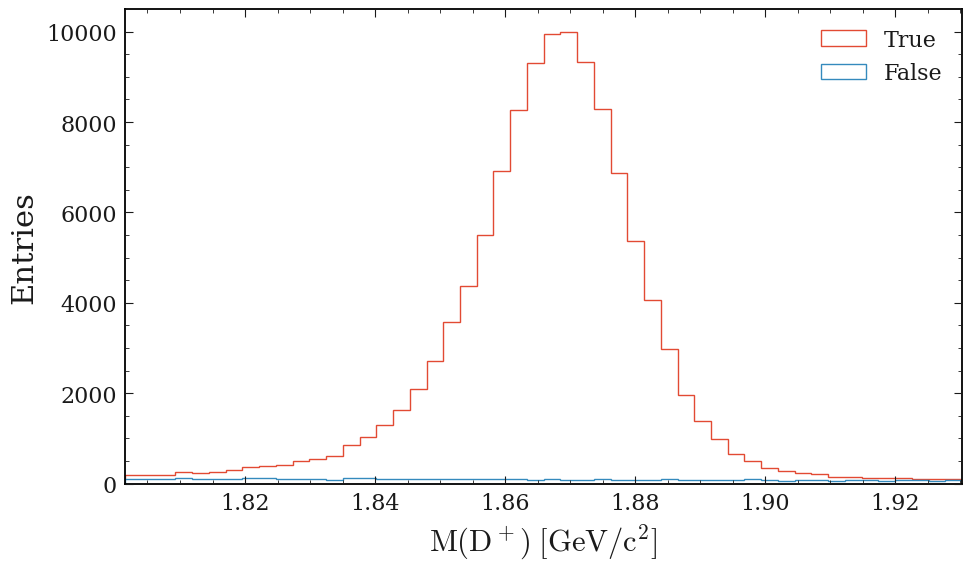

In [122]:
import matplotlib.pyplot as plt

base_filter = "etapip_gg_rank==1"
variables = ['Dp_M','Dp_isSignal','Dp_chiProb']
tree = 'etapip_gg'

Df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
Df2 = df.query('Dp_isSignal==1')
std_dev_Dp_M_true = Df2['Dp_M'].std()
print("Standard deviation of column 'Dp_M':", std_dev_Dp_M_true)

x_start = 1.8697 - 4.5*std_dev_Dp_M_true
x_end = 1.8697 + 4*std_dev_Dp_M_true

xm = np.linspace(x_start,x_end,51)

# Create a new column 'category_group' based on 'category_index'
df['category_group'] = df['category_index'].apply(lambda x: 'True' if x == 0 else 'False')

df_true = df.query('category_group=="True"')
df_false = df.query('category_group=="False"')

# Plot stacked histograms based on the new 'category_group' column
plt.figure(figsize=(10, 6))
# df.groupby('category_group')['Dp_M'].plot(kind='hist', bins=xm, histtype='step', stacked=True)

plt.hist([df_false["Dp_M"], df_true["Dp_M"]],
         bins=xm, histtype='step', label=[ 'False', 'True'], stacked=True)

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
plt.ylabel('Entries')
# plt.title('Stacked Histogram of Dp_M by Category Index')
plt.legend()
plt.xlim(x_start, x_end)
plt.tight_layout()
plt.show()



<Figure size 1000x600 with 0 Axes>

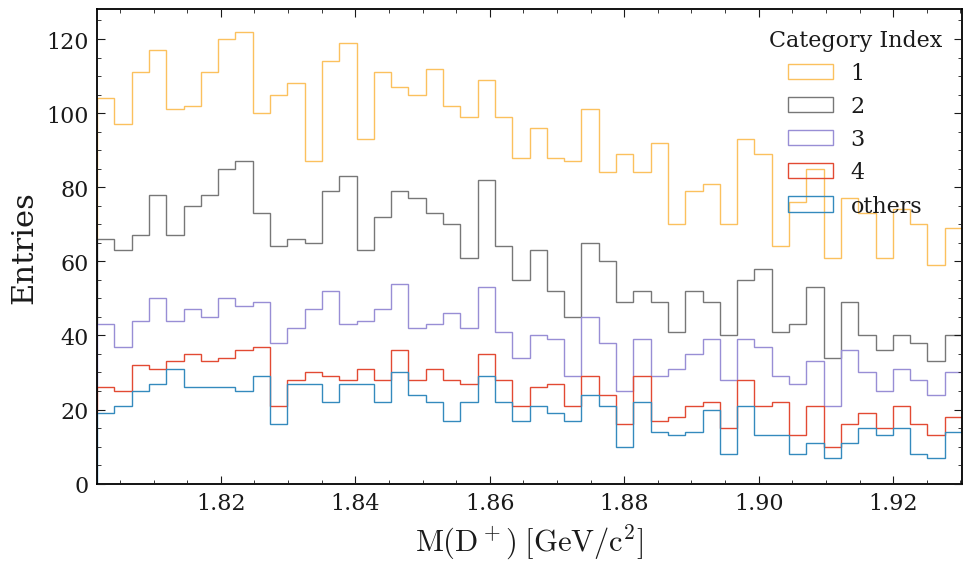

In [124]:
# Plot stacked histograms based on the new 'category_group' column
plt.figure(figsize=(10, 6))
df_index1 = df.query('category_index==1')
df_index2 = df.query('category_index==2')
df_index3 = df.query('category_index==3')
df_index4 = df.query('category_index==4')
df_index_others = df.query('category_index!=0 & category_index!=1 & category_index!=2 & \
                            category_index!=3 & category_index!=4')

# Plot stacked histograms based on the new 'category_group' column
plt.figure(figsize=(10, 6))

plt.hist([df_index_others["Dp_M"], df_index4["Dp_M"], df_index3["Dp_M"], df_index2["Dp_M"], df_index1["Dp_M"]],
         bins=xm, histtype='step', label=['others', '4', '3', '2', '1'], stacked=True)

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
plt.ylabel('Entries')
plt.legend(title='Category Index')
plt.xlim(x_start, x_end)
plt.tight_layout()
file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg/MC15ri_tight_v1_DpM_false_mcerror.png"
plt.savefig(file1_name)
plt.show()


# D+ -> (eta -> 3pi) pi+

In [216]:
file = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_pipipi/240405_tight_v1_treefit_BCS_etapi0const/'
file += '*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
base_filter = "Dp_M>0"
# base_filter += " && eta_Pi0_M > 0.12 && eta_Pi0_M<0.145"
variables = ['Dp_M','Dp_isSignal','Dp_chiProb','eta_Pi0_M','eta_Pi0_isSignal','Dp_mcErrors','etapip_Eta_M','etapip_Eta_isSignal','eta_Pi0_Easym']
tree = 'etapip_pipipi'

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dp_isSignal==1')
std_dev_Dp_M_true = df2['Dp_M'].std()
print("Standard deviation of column 'Dp_M':", std_dev_Dp_M_true)

x_start = 1.8697 - 4.5*std_dev_Dp_M_true
x_end = 1.8697 + 4*std_dev_Dp_M_true
x_start = 1.6
x_end = 2.1


print(x_start)
print(x_end)


# base_filter=' Dp_M>0'
base_filter = "Dp_M>0"
base_filter+=' &&  Dp_M>' + str(x_start) + ' && Dp_M<' + str(x_end)
# base_filter += " && eta_Pi0_M > 0.12 && eta_Pi0_M<0.145"

tree = 'etapip_pipipi'
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D+ -> (eta -> 3pi) pi+ eff:' + str(D0signal_eff))

Standard deviation of column 'Dp_M': 0.015556157530058977
1.6
2.1
20
signal_eff=0.0717, signal_eff_error= 0.0003 ,eff=0.0938, purity=0.7647, multiplicity=1.1370, 
D+ -> (eta -> 3pi) pi+ eff:0.07173


93801


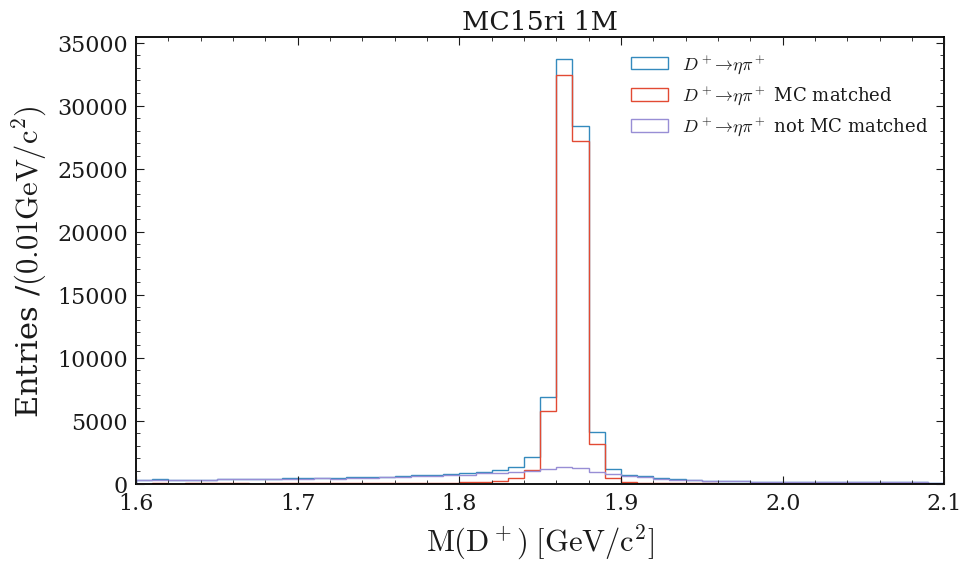

In [217]:
# variables = ['Dp_M','Dp_isSignal','Dp_chiProb','Dp_mcErrors']

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dp_isSignal==1')
df3 = df.query('Dp_isSignal!=1')

fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
xrange = (x_start,x_end,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=13)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi/MC15ri_3pi_tight_v1_DpM.png"
plt.savefig(file1_name)
print(len(df))

In [199]:
file = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_pipipi/240405_tight_v1_treefit_BCS_etapi0const/'
file += '*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
base_filter = "etapip_pipipi_rank==1"
# base_filter += " && eta_Pi0_M > 0.12 && eta_Pi0_M<0.145"
variables = ['Dp_M','Dp_isSignal','Dp_chiProb','eta_Pi0_M','eta_Pi0_isSignal','Dp_mcErrors','etapip_Eta_M','etapip_Eta_isSignal','eta_Pi0_Easym']
tree = 'etapip_pipipi'

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dp_isSignal==1')
std_dev_Dp_M_true = df2['Dp_M'].std()
print("Standard deviation of column 'Dp_M':", std_dev_Dp_M_true)

x_start = 1.8697 - 4.5*std_dev_Dp_M_true
x_end = 1.8697 + 4*std_dev_Dp_M_true
# x_start = 1.6
# x_end = 2.1


print(x_start)
print(x_end)


# base_filter=' Dp_M>0'
base_filter='etapip_pipipi_rank==1'
base_filter+=' &&  Dp_M>' + str(x_start) + ' && Dp_M<' + str(x_end)
# base_filter += " && eta_Pi0_M > 0.12 && eta_Pi0_M<0.145"

tree = 'etapip_pipipi'
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D+ -> (eta -> 3pi) pi+ eff:' + str(D0signal_eff))

Standard deviation of column 'Dp_M': 0.015528605803760474
1.7998212738830779
1.9318144232150418
20
signal_eff=0.0688, signal_eff_error= 0.0003 ,eff=0.0756, purity=0.9099, multiplicity=1.0000, 
D+ -> (eta -> 3pi) pi+ eff:0.06881899999999999


75635


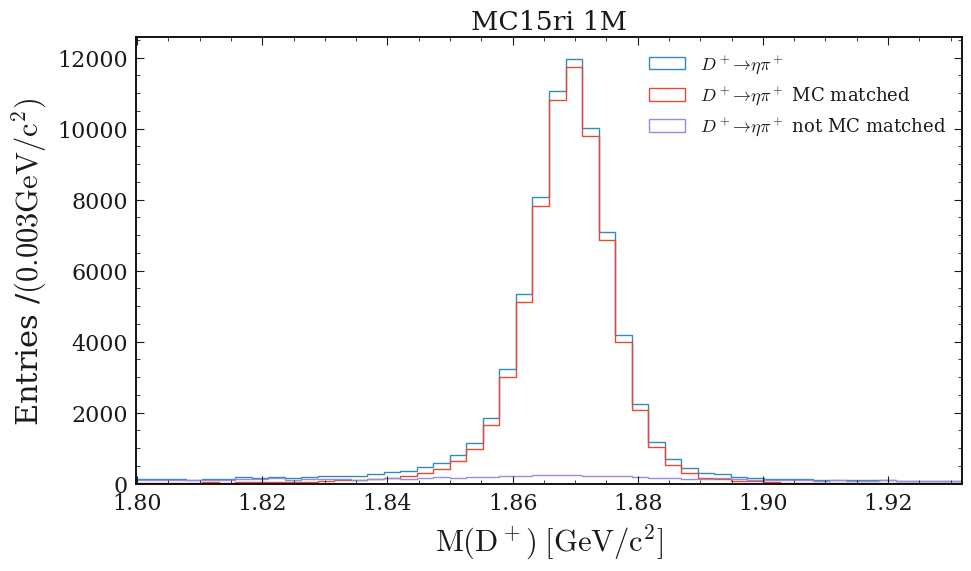

In [200]:
# variables = ['Dp_M','Dp_isSignal','Dp_chiProb','Dp_mcErrors']

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dp_isSignal==1')
df3 = df.query('Dp_isSignal!=1')

fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
xrange = (x_start,x_end,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=13)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi/MC15ri_3pi_tight_v1_DpM_BCS_SR.png"
plt.savefig(file1_name)
print(len(df))

75635


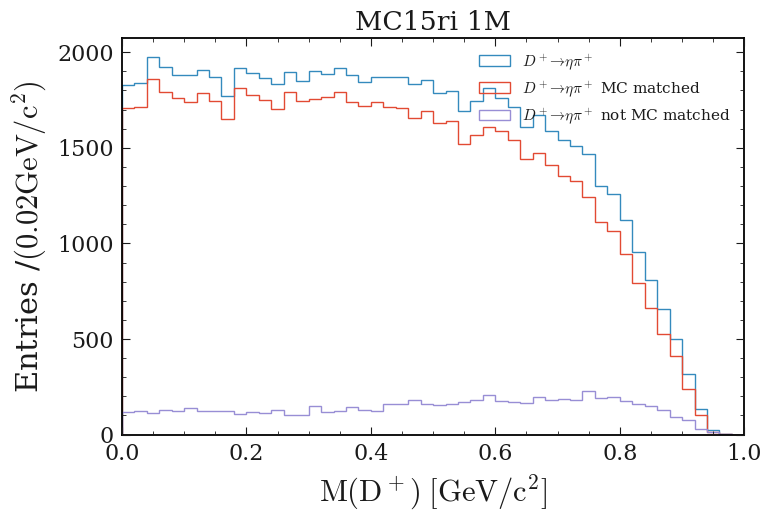

In [201]:
# variables = ['Dp_M','Dp_isSignal','Dp_chiProb','Dp_mcErrors']

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dp_isSignal==1')
df3 = df.query('Dp_isSignal!=1')

fig = plt.figure()
ax = fig.subplots()
xrange = (0,1,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["eta_Pi0_Easym"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["eta_Pi0_Easym"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["eta_Pi0_Easym"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["eta_Pi0_Easym"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg/MC15ri_tight_v0_looseeta_BCS_DpM_BCS_SR.png"
# plt.savefig(file1_name)
print(len(df))

In [202]:
df['Dp_mcErrors'].describe()

count    75635.000000
mean        36.479090
std        121.774909
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        512.000000
Name: Dp_mcErrors, dtype: float64

In [203]:
# Function to convert decimal to binary
def decimal_to_binary(decimal):
    return bin(decimal)[2:]  # [2:] to remove the '0b' prefix

# Convert 'A' column from float to int
df['Dp_mcErrors'] = df['Dp_mcErrors'].astype(int)

# Apply the function to the DataFrame column
df['Dp_mcErrors_binary'] = df['Dp_mcErrors'].apply(decimal_to_binary)

df['Dp_mcErrors_binary'].describe()

count     75635
unique       32
top           0
freq      68819
Name: Dp_mcErrors_binary, dtype: object

In [204]:
df['Dp_mcErrors_binary'].unique()

array(['0', '1000000000', '100110000', '100', '100010000', '100111000',
       '101111000', '100110100', '111110100', '101110000', '100111100',
       '110010100', '110010000', '110110100', '100010100', '110111100',
       '100100000', '110110000', '110111000', '111111100', '10000',
       '111110000', '110100000', '100101000', '110100100', '100100100',
       '101100000', '101110100', '111111000', '10100000', '100000',
       '111101000'], dtype=object)

In [205]:
import pandas as pd

def categorize_flags(decimal_value):
    categories = {
        0: "c_Correct",
        1: "c_MissFSR",
        2: "c_MissingResonance",
        4: "c_DecayInFlight",
        8: "c_MissNeutrino",
        16: "c_MissGamma",
        32: "c_MissMassiveParticle",
        64: "c_MissKlong",
        128: "c_MisID",
        256: "c_AddedWrongParticle",
        512: "c_InternalError",
        1024: "c_MissPHOTOS",
        2048: "c_AddedRecoBremsPhoton"
    }

    categorized_flags = []
    for value, category in categories.items():
        if decimal_value & value:
            categorized_flags.append(category)
    
    return ', '.join(categorized_flags)

# Example DataFrame
# df = pd.DataFrame({'Dp_mcErrors': [48, 512, 1024]})

# Apply the categorize_flags function to the "Dp_mcErrors" column
df['matching_categories'] = df['Dp_mcErrors'].apply(categorize_flags)

print(df['matching_categories'])


0                       
1        c_InternalError
2                       
3                       
4                       
              ...       
75630                   
75631                   
75632                   
75633    c_InternalError
75634    c_InternalError
Name: matching_categories, Length: 75635, dtype: object


In [206]:
df['matching_categories'].unique()

array(['', 'c_InternalError',
       'c_MissGamma, c_MissMassiveParticle, c_AddedWrongParticle',
       'c_DecayInFlight', 'c_MissGamma, c_AddedWrongParticle',
       'c_MissNeutrino, c_MissGamma, c_MissMassiveParticle, c_AddedWrongParticle',
       'c_MissNeutrino, c_MissGamma, c_MissMassiveParticle, c_MissKlong, c_AddedWrongParticle',
       'c_DecayInFlight, c_MissGamma, c_MissMassiveParticle, c_AddedWrongParticle',
       'c_DecayInFlight, c_MissGamma, c_MissMassiveParticle, c_MissKlong, c_MisID, c_AddedWrongParticle',
       'c_MissGamma, c_MissMassiveParticle, c_MissKlong, c_AddedWrongParticle',
       'c_DecayInFlight, c_MissNeutrino, c_MissGamma, c_MissMassiveParticle, c_AddedWrongParticle',
       'c_DecayInFlight, c_MissGamma, c_MisID, c_AddedWrongParticle',
       'c_MissGamma, c_MisID, c_AddedWrongParticle',
       'c_DecayInFlight, c_MissGamma, c_MissMassiveParticle, c_MisID, c_AddedWrongParticle',
       'c_DecayInFlight, c_MissGamma, c_AddedWrongParticle',
       'c_Deca

In [207]:
# Assuming you have already created the 'categories' column in your DataFrame

# Count the number of unique values in the 'categories' column
unique_categories_count = df['matching_categories'].nunique()

print("Number of rows with unique categories:", unique_categories_count)


Number of rows with unique categories: 32


In [208]:
# Count the number of occurrences of each unique value in the 'categories' column
unique_categories_counts = df['matching_categories'].value_counts()

# Display the counts as a table
unique_categories_counts_df = pd.DataFrame({'Categories': unique_categories_counts.index, 
                                            'Count': unique_categories_counts.values})
print(unique_categories_counts_df)

                                           Categories  Count
0                                                      68819
1                                     c_InternalError   3394
2                   c_MissGamma, c_AddedWrongParticle   1215
3   c_MissGamma, c_MissMassiveParticle, c_AddedWro...    894
4   c_MissGamma, c_MissMassiveParticle, c_MissKlon...    421
5                                     c_DecayInFlight    191
6   c_MissNeutrino, c_MissGamma, c_MissMassivePart...    163
7   c_DecayInFlight, c_MissGamma, c_MisID, c_Added...    107
8          c_MissGamma, c_MisID, c_AddedWrongParticle     86
9   c_MissNeutrino, c_MissGamma, c_MissMassivePart...     80
10  c_DecayInFlight, c_MissGamma, c_MissMassivePar...     59
11  c_MissGamma, c_MissMassiveParticle, c_MisID, c...     40
12        c_MissMassiveParticle, c_AddedWrongParticle     39
13  c_DecayInFlight, c_MissGamma, c_MissMassivePar...     27
14  c_MissGamma, c_MissMassiveParticle, c_MissKlon...     17
15  c_DecayInFlight, c_M

In [209]:
# Iterate through each row of the DataFrame with row number
for index, row in unique_categories_counts_df.iterrows():
    print("Row {}: Category: {}, Count: {}".format(index, row['Categories'], row['Count']))


Row 0: Category: , Count: 68819
Row 1: Category: c_InternalError, Count: 3394
Row 2: Category: c_MissGamma, c_AddedWrongParticle, Count: 1215
Row 3: Category: c_MissGamma, c_MissMassiveParticle, c_AddedWrongParticle, Count: 894
Row 4: Category: c_MissGamma, c_MissMassiveParticle, c_MissKlong, c_AddedWrongParticle, Count: 421
Row 5: Category: c_DecayInFlight, Count: 191
Row 6: Category: c_MissNeutrino, c_MissGamma, c_MissMassiveParticle, c_AddedWrongParticle, Count: 163
Row 7: Category: c_DecayInFlight, c_MissGamma, c_MisID, c_AddedWrongParticle, Count: 107
Row 8: Category: c_MissGamma, c_MisID, c_AddedWrongParticle, Count: 86
Row 9: Category: c_MissNeutrino, c_MissGamma, c_MissMassiveParticle, c_MissKlong, c_AddedWrongParticle, Count: 80
Row 10: Category: c_DecayInFlight, c_MissGamma, c_MissMassiveParticle, c_MisID, c_AddedWrongParticle, Count: 59
Row 11: Category: c_MissGamma, c_MissMassiveParticle, c_MisID, c_AddedWrongParticle, Count: 40
Row 12: Category: c_MissMassiveParticle, c_Ad

In [210]:
# Create a dictionary mapping each unique category to an index number
category_to_index = {category: index for index, category in enumerate(unique_categories_counts_df['Categories'])}

# Map the categories to their index numbers and put them into the existing DataFrame
df['category_index'] = df['matching_categories'].map(category_to_index)

# Print the updated DataFrame
# print(df)
print(df['category_index'].unique())


[ 0  1  3  5  2  6  9 19 13  4 26  7  8 10 16 15 12 11 21 20 17 14 29 22
 25 30 23 24 18 27 28 31]


In [211]:
# file = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_pipipi/240405_tight_v1_treefit_BCS_etapi0const/'
# file += '*.root'
# # base_filter=' D0_M>1.68 && D0_M<2.0'
# base_filter = "etapip_pipipi_rank==1"
# # base_filter += " && eta_Pi0_M > 0.12 && eta_Pi0_M<0.145"
# variables = ['Dp_M','Dp_isSignal','Dp_chiProb','eta_Pi0_M','eta_Pi0_isSignal','Dp_mcErrors','etapip_Eta_M','etapip_Eta_isSignal','eta_Pi0_Easym']
# tree = 'etapip_pipipi'

# df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
# df2 = df.query('Dp_isSignal==1')
# std_dev_Dp_M_true = df2['Dp_M'].std()
# print("Standard deviation of column 'Dp_M':", std_dev_Dp_M_true)

# x_start = 1.8697 - 4.5*std_dev_Dp_M_true
# x_end = 1.8697 + 4*std_dev_Dp_M_true
# # x_start = 1.6
# # x_end = 2.1


# print(x_start)
# print(x_end)


Standard deviation of column 'Dp_M': 0.015528605803760474
1.7998212738830779
1.9318144232150418


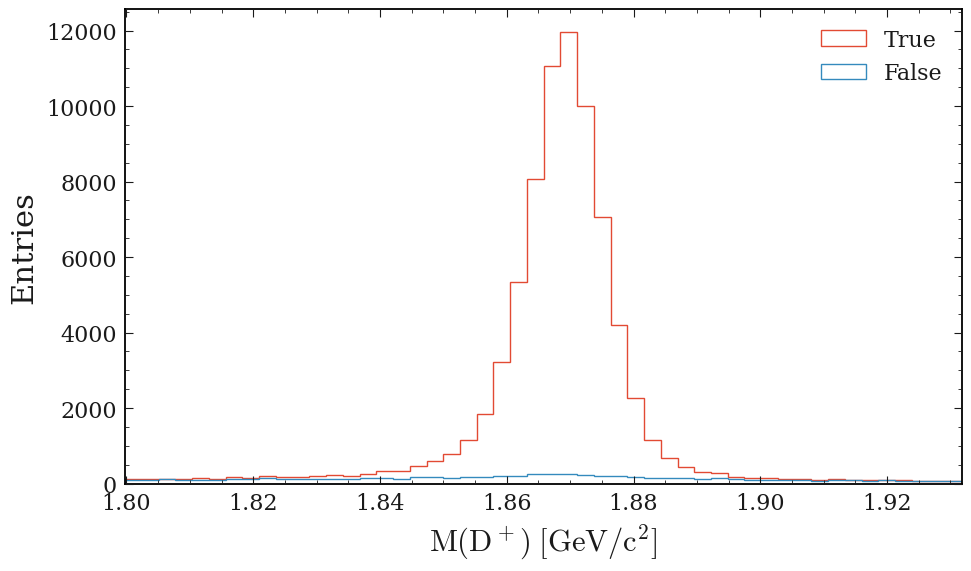

82500


In [213]:
import matplotlib.pyplot as plt

# base_filter=' D0_M>1.68 && D0_M<2.0'
base_filter = "etapip_pipipi_rank==1"
# base_filter += " && eta_Pi0_M > 0.12 && eta_Pi0_M<0.145"
variables = ['Dp_M','Dp_isSignal','Dp_chiProb','eta_Pi0_M','eta_Pi0_isSignal','Dp_mcErrors','etapip_Eta_M','etapip_Eta_isSignal','eta_Pi0_Easym']
tree = 'etapip_pipipi'

Df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
Df2 = Df.query('Dp_isSignal==1')
std_dev_Dp_M_true = Df2['Dp_M'].std()
print("Standard deviation of column 'Dp_M':", std_dev_Dp_M_true)

x_start = 1.8697 - 4.5*std_dev_Dp_M_true
x_end = 1.8697 + 4*std_dev_Dp_M_true
# x_start = 1.6
# x_end = 2.1


print(x_start)
print(x_end)

# x_start = 1.6
# x_end = 2.1

xm = np.linspace(x_start,x_end,51)

# Create a new column 'category_group' based on 'category_index'
df['category_group'] = df['category_index'].apply(lambda x: 'True' if x == 0 else 'False')

df_true = df.query('category_group=="True"')
df_false = df.query('category_group=="False"')

# Plot stacked histograms based on the new 'category_group' column
plt.figure(figsize=(10, 6))
# df.groupby('category_group')['Dp_M'].plot(kind='hist', bins=xm, histtype='step', stacked=True)

plt.hist([df_false["Dp_M"], df_true["Dp_M"]],
         bins=xm, histtype='step', label=[ 'False', 'True'], stacked=True)

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
plt.ylabel('Entries')
# plt.title('Stacked Histogram of Dp_M by Category Index')
plt.legend()
plt.xlim(x_start, x_end)
plt.tight_layout()
plt.show()

print(len(Df))



<Figure size 1000x600 with 0 Axes>

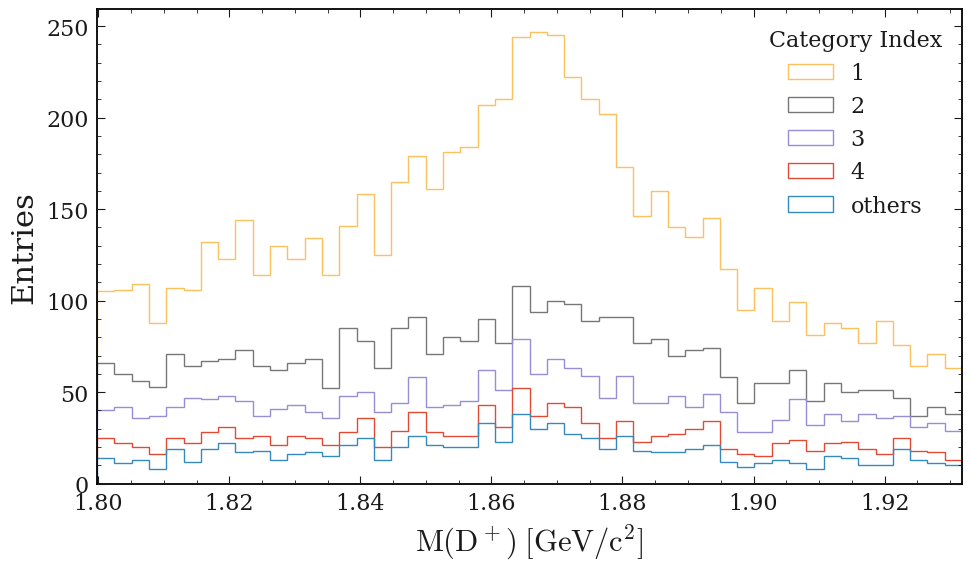

In [214]:
# Plot stacked histograms based on the new 'category_group' column
plt.figure(figsize=(10, 6))
df_index1 = df.query('category_index==1')
df_index2 = df.query('category_index==2')
df_index3 = df.query('category_index==3')
df_index4 = df.query('category_index==4')
df_index_others = df.query('category_index!=0 & category_index!=1 & category_index!=2 & \
                            category_index!=3 & category_index!=4')

# Plot stacked histograms based on the new 'category_group' column
plt.figure(figsize=(10, 6))

plt.hist([df_index_others["Dp_M"], df_index4["Dp_M"], df_index3["Dp_M"], df_index2["Dp_M"], df_index1["Dp_M"]],
         bins=xm, histtype='step', label=['others', '4', '3', '2', '1'], stacked=True)

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
plt.ylabel('Entries')
plt.legend(title='Category Index')
plt.xlim(x_start, x_end)
plt.tight_layout()
file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi/MC15ri_3pi_tight_v1_DpM_false_mcerror.png"
plt.savefig(file1_name)
plt.show()


<Figure size 1000x600 with 0 Axes>

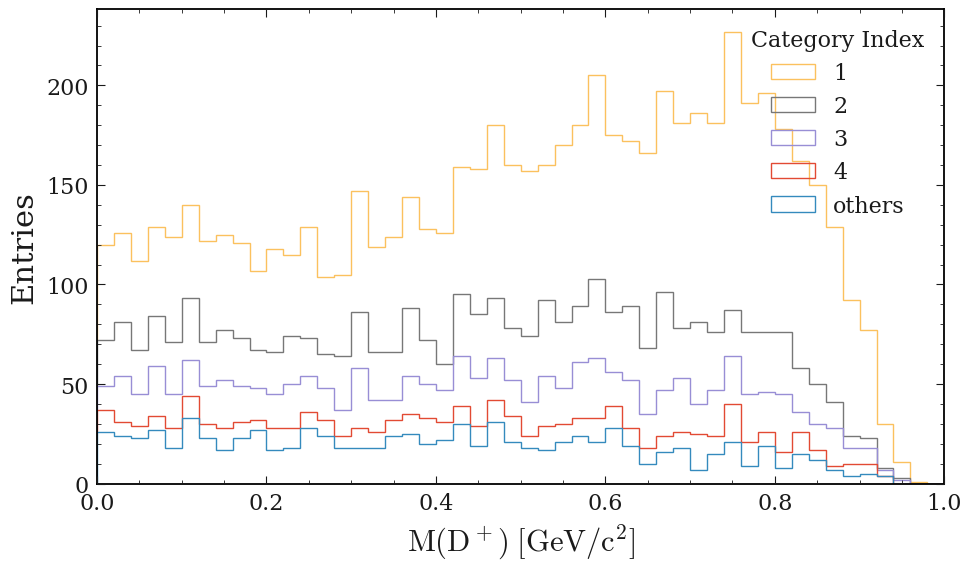

In [215]:
# Plot stacked histograms based on the new 'category_group' column
plt.figure(figsize=(10, 6))
df_index1 = df.query('category_index==1')
df_index2 = df.query('category_index==2')
df_index3 = df.query('category_index==3')
df_index4 = df.query('category_index==4')
df_index_others = df.query('category_index!=0 & category_index!=1 & category_index!=2 & \
                            category_index!=3 & category_index!=4')

# Plot stacked histograms based on the new 'category_group' column
plt.figure(figsize=(10, 6))

plt.hist([df_index_others["eta_Pi0_Easym"], df_index4["eta_Pi0_Easym"], df_index3["eta_Pi0_Easym"], df_index2["eta_Pi0_Easym"], df_index1["eta_Pi0_Easym"]],
         bins=np.linspace(0,1,51), histtype='step', label=['others', '4', '3', '2', '1'], stacked=True)

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
plt.ylabel('Entries')
plt.legend(title='Category Index')
plt.xlim(0,1)
plt.tight_layout()
plt.show()


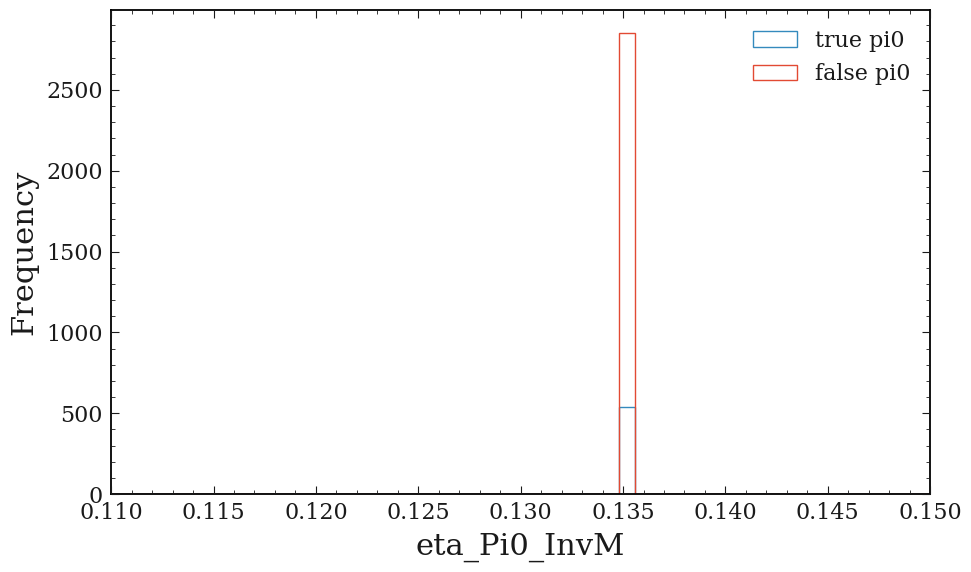

In [31]:
plt.figure(figsize=(10, 6))
x_start=0.11
x_end=0.15

plt.hist(df_index1.query('eta_Pi0_isSignal==1')['eta_Pi0_M'], bins=50, range=(x_start, x_end), histtype='step',label='true pi0')
plt.hist(df_index1.query('eta_Pi0_isSignal!=1')['eta_Pi0_M'], bins=50, range=(x_start, x_end), histtype='step',label='false pi0')

plt.xlabel('eta_Pi0_InvM')
plt.ylabel('Frequency')
# plt.title('Histogram of Dp_chiProb')
plt.legend()
plt.xlim(x_start, x_end)

plt.tight_layout()
plt.show()


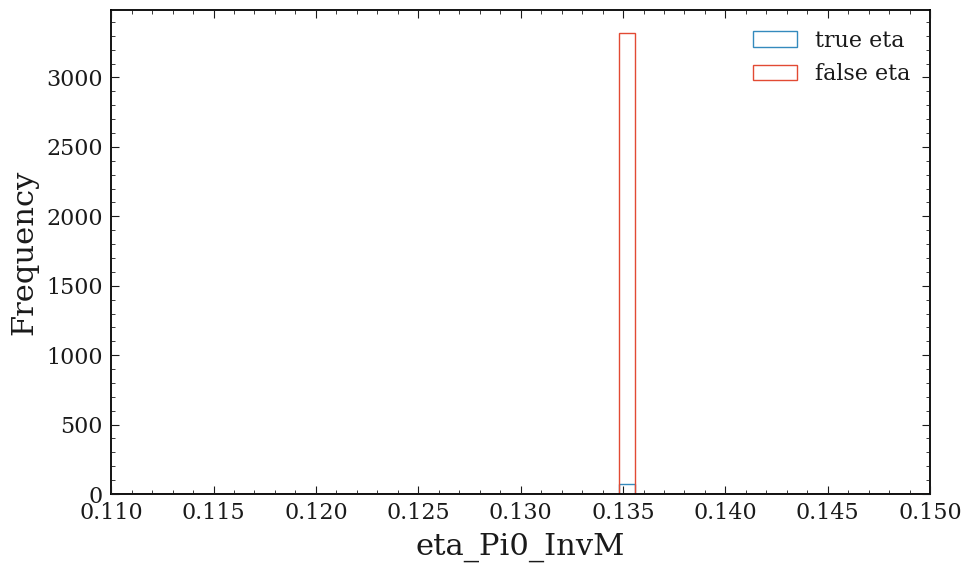

In [32]:
plt.figure(figsize=(10, 6))
x_start=0.11
x_end=0.15

plt.hist(df_index1.query('etapip_Eta_isSignal==1')['eta_Pi0_M'], bins=50, range=(x_start, x_end), histtype='step',label='true eta')
plt.hist(df_index1.query('etapip_Eta_isSignal!=1')['eta_Pi0_M'], bins=50, range=(x_start, x_end), histtype='step',label='false eta')

plt.xlabel('eta_Pi0_InvM')
plt.ylabel('Frequency')
# plt.title('Histogram of Dp_chiProb')
plt.legend()
plt.xlim(x_start, x_end)

plt.tight_layout()
plt.show()


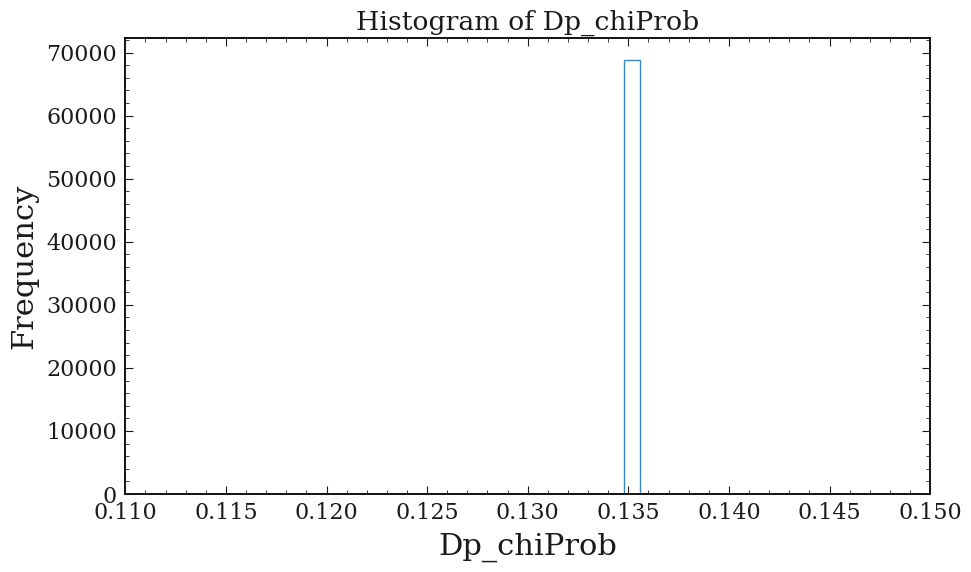

In [33]:
plt.figure(figsize=(10, 6))
x_start=0.11
x_end=0.15


plt.hist(df_true['eta_Pi0_M'], bins=50, range=(x_start, x_end), histtype='step')
plt.xlabel('Dp_chiProb')
plt.ylabel('Frequency')
plt.title('Histogram of Dp_chiProb')
plt.xlim(x_start, x_end)

plt.tight_layout()
plt.show()
